# 2. 그래프와 시각화

## 기본 설정

In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)
np.random.seed(12345)

In [2]:
import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))  # 그림 크기 설정

## matplotlib.pyplot의 시각화 도구 API

### `matplotlib.pyplot.plot()`
- 2차원 그래프를 그리는 함수이다.
- y축 좌표들의 리스트 또는 어레이만 인자로 넣어줄 때이다. x축 좌표는 해당 값들의 인덱스로 사용됨
- [참고](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

### `Figure` 객체와 서브플롯(subplot)

- 모든 그래프는 `Figure` 객체 내에 존재
- `matplotlib.pyplot.figure()` 함수에 의해 생성

__참고:__ 
- 주피터 노트북을 사용시  `matplotlib.pyplot.figure()`, `matplotlib.pyplot.add_subplot()` 등 그래프를 그래프화 관련된 함수들은 모두 같은 셀에서 실행되어야 한다. 

- 서브플롯(subplot)
    - `Figure` 객체 내에 그래프를 그리기 위해 서브플롯(subplot)을 지정
    - `add_subplot()` 함수를 이용하여 지정된 `Figure` 객체안에 그래프를 그릴 공간을 만들어 보자

- subplot 추가

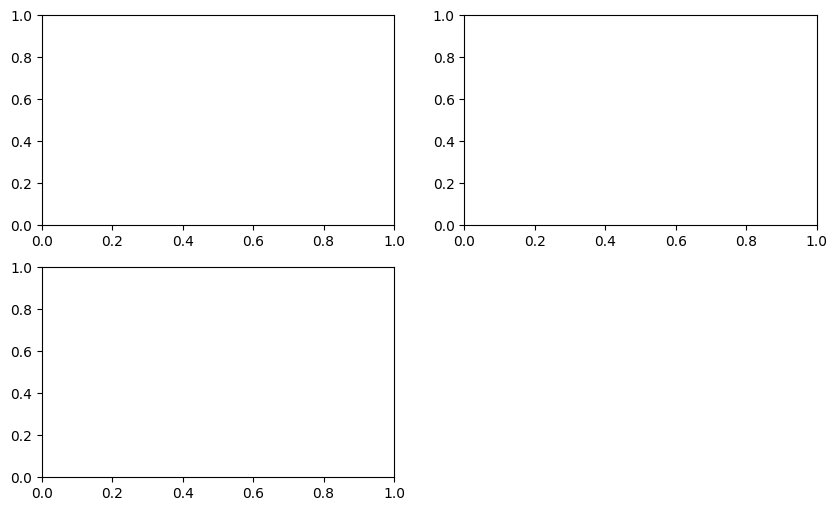

In [4]:
fig = plt.figure()
ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_3 = fig.add_subplot(2,2,3)

#### 그래프 삽입
- `matplotlib.pyplot.plot()`
- `<object>.plot()`

##### 방법 1: `matplotlib.pyplot.plot()`

- 마지막에 선언된 서브플롯에 그래프를 그린다.
- 예) 누적합을 나타내는 그래프를 그려보자

In [5]:
from numpy.random import randn
data = randn(100).cumsum()

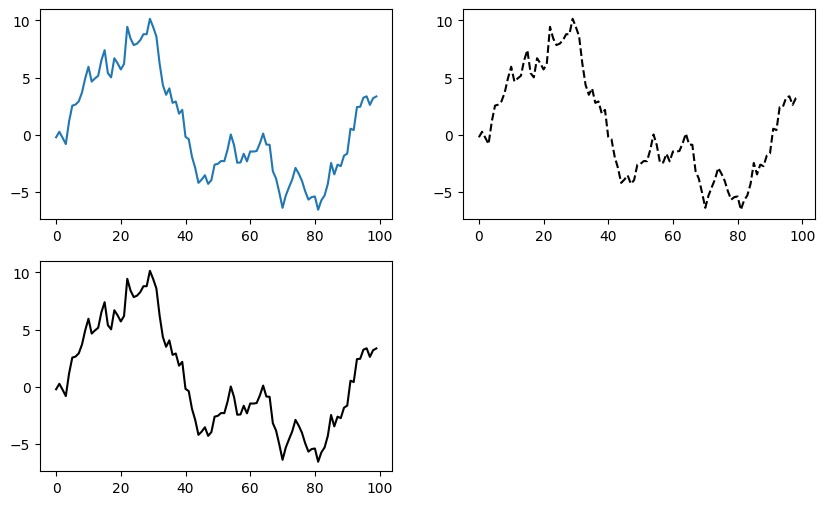

In [11]:
fig = plt.figure()
ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_3 = fig.add_subplot(2,2,3)

ax_1.plot(data)
ax_2.plot(data, "k--")
ax_3.plot(data,"k-")
plt.show()

In [ ]:
# 2x2인 subplot을 만들고
# 임의의 데이터를 만들어서 
# 첫번째에는 scatter 두번째에는 histo 세번째는 plot 그리기

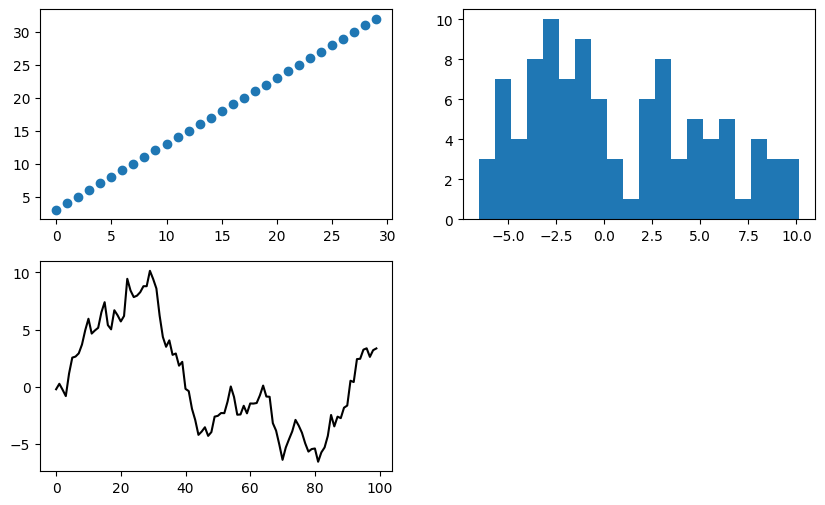

In [18]:
scat_data = np.arange(30)
fig = plt.figure()
ax_1 = fig.add_subplot(2,2,1)
ax_2 = fig.add_subplot(2,2,2)
ax_3 = fig.add_subplot(2,2,3)

ax_1.scatter(scat_data, np.arange(30) + 3)
ax_2.hist(data, bins =20)
ax_3.plot(data,"k-")
plt.show()

##### 방식 2: `객체명.plot()` 함수 활용

- 특정 서브플롯에 그래프를 삽입하려면 객체 이름과 함께 `plot()` 함수 등을 호출

#### 서브플롯 관리

- `matplotlib.pyplot.subplots()`
    - 여러 개의 서브플롯을 포함하는 `Figure` 객체를 관리해준다.

- 예) 2x3 크기의 서브플롯을 담은 (2,3) 모양의 넘파이 어레이로 생성.

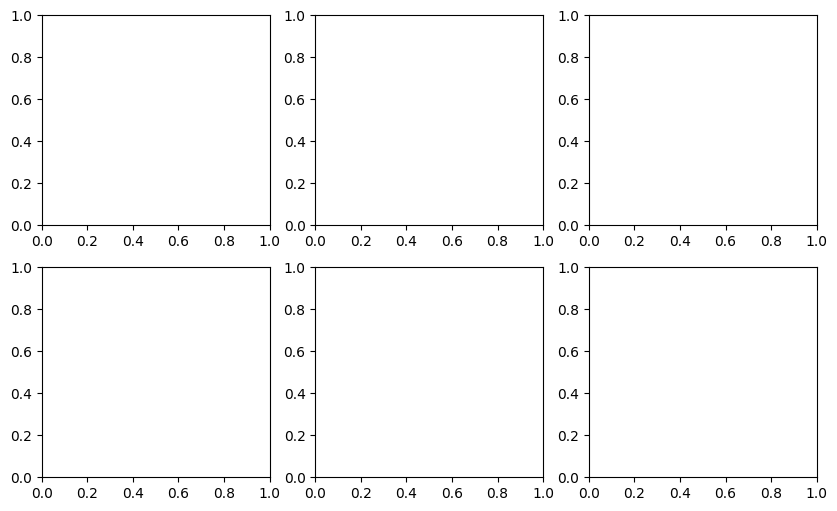

In [20]:
fig, axes = plt.subplots(2,3)

- `plt.subplots_adjust()` 
    - 각 서브플롯 사이의 여백을 조절
    - 여백의 크기는 그래프의 크기와 숫자에 의존한다.

- 예) 여백이 0인 경우

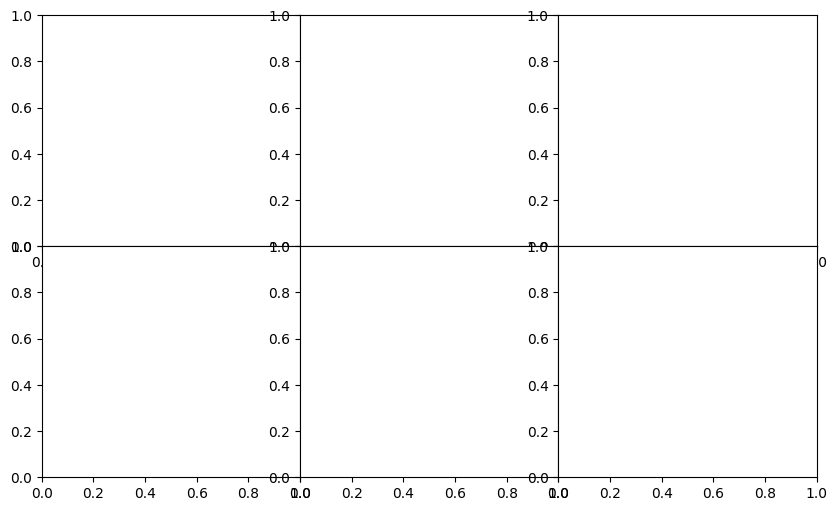

In [19]:
fig, axis = plt.subplots(2,3)
plt.subplots_adjust(wspace=0, hspace=0)

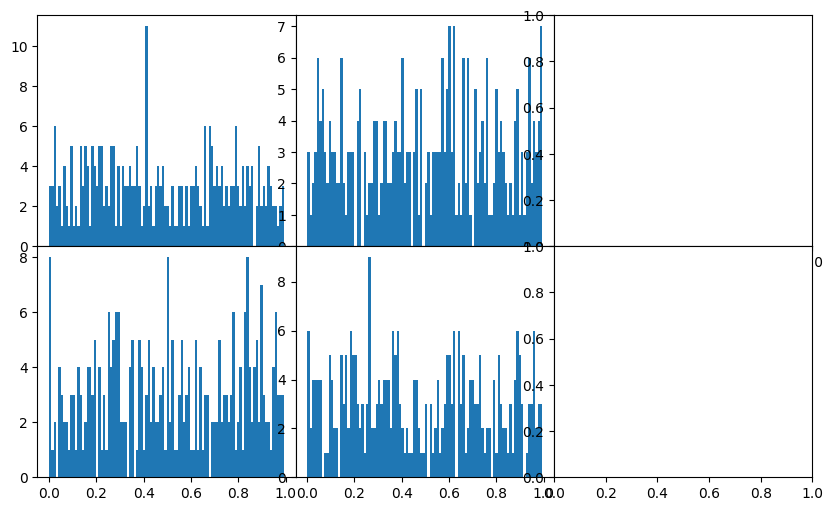

In [23]:
fig, axis = plt.subplots(2,3)
for i in range(2):
    for j in range(2):
        axis[i,j].hist(np.random.rand(300), bins = 100)
plt.subplots_adjust(wspace=0, hspace=0)

Figure(1000x600)


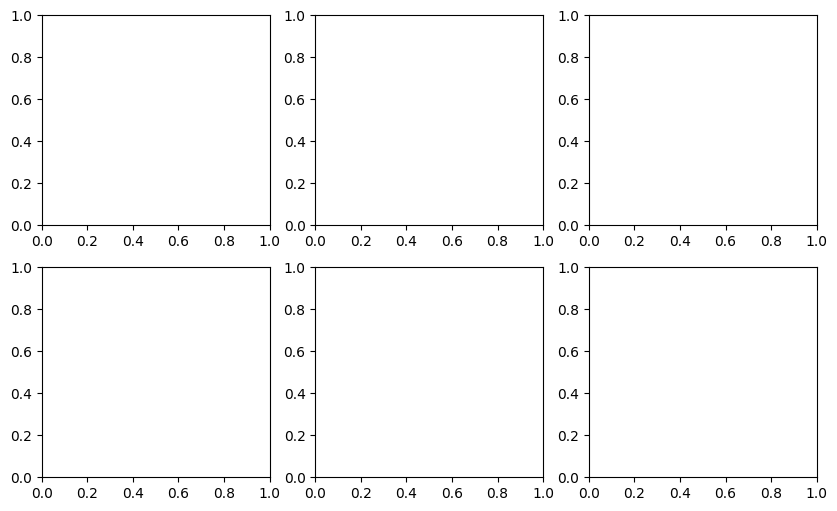

In [24]:
fig, axis = plt.subplots(2,3)
print(fig)

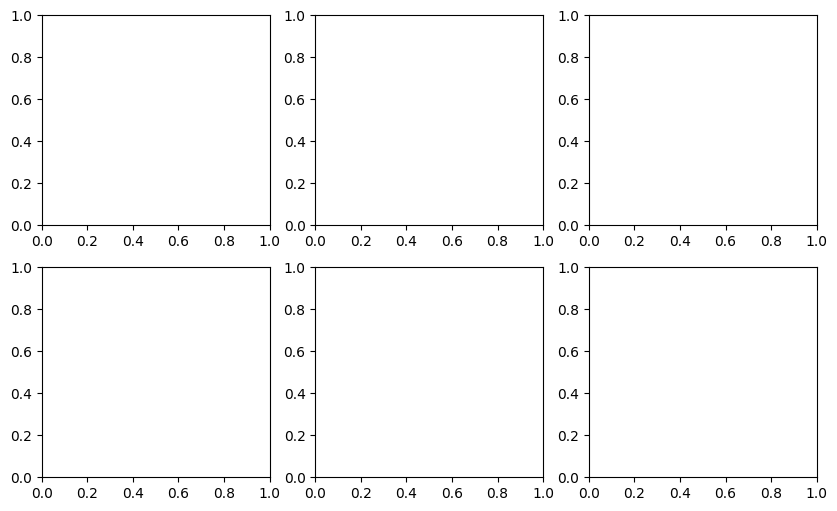

In [21]:
fig, axis = plt.subplots(2,3)
#subplots_adjust = 기본 값만 사용해도 보기 좋게 출력된다.
plt.subplots_adjust()

- 예) 여백이 1인 경우

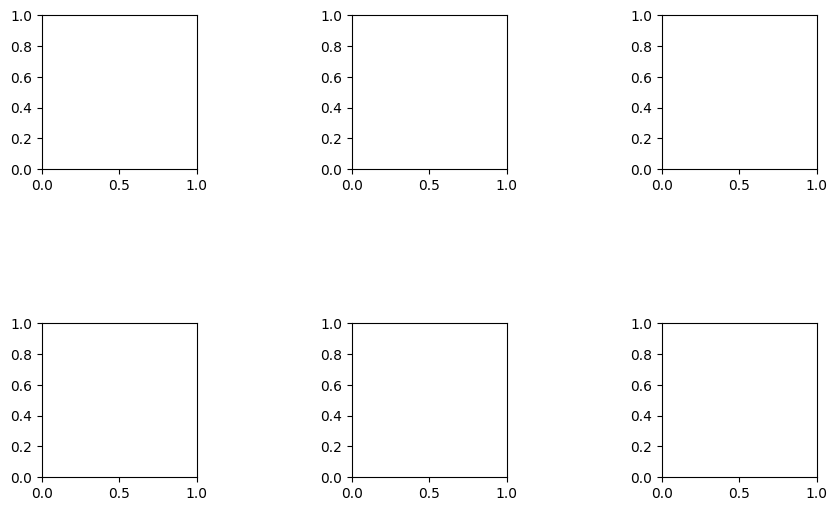

In [25]:
fig, axis = plt.subplots(2,3)
#subplots_adjust = 기본 값만 사용해도 보기 좋게 출력된다.
plt.subplots_adjust(wspace=1, hspace=1)

### 색상, 마커, 선 스타일

- 그래프의 속성을 변경하면 스타일이 변경된다.
- 방법 1: 문자열 방식

```python
ax.plot(x, y, 'g--')
```

- 방법 2: 키워드 인자 지정 방식

```python
ax.plot(x, y, linestyle='--', color='g')
```

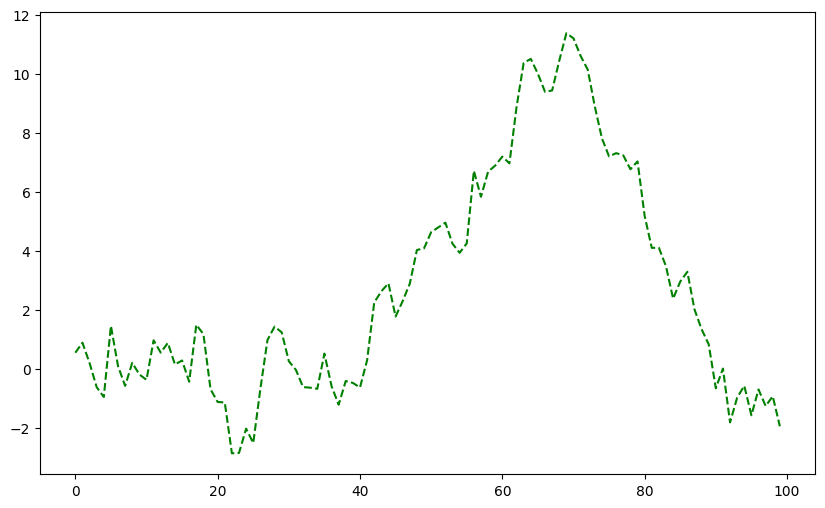

In [26]:
plt.plot(randn(100).cumsum(), "g--")

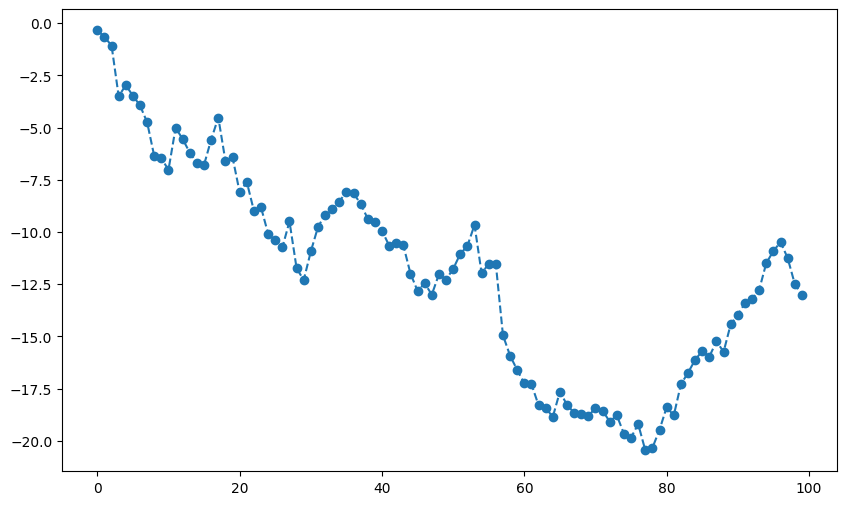

In [27]:
plt.plot(randn(100).cumsum(), marker="o", linestyle="dashed")

색상은 RGB 값을 HEX 코드를 이용하여 직접 사용 가능
- [RGB HEX 코드 link](https://www.w3schools.com/colors/colors_rgb.asp)

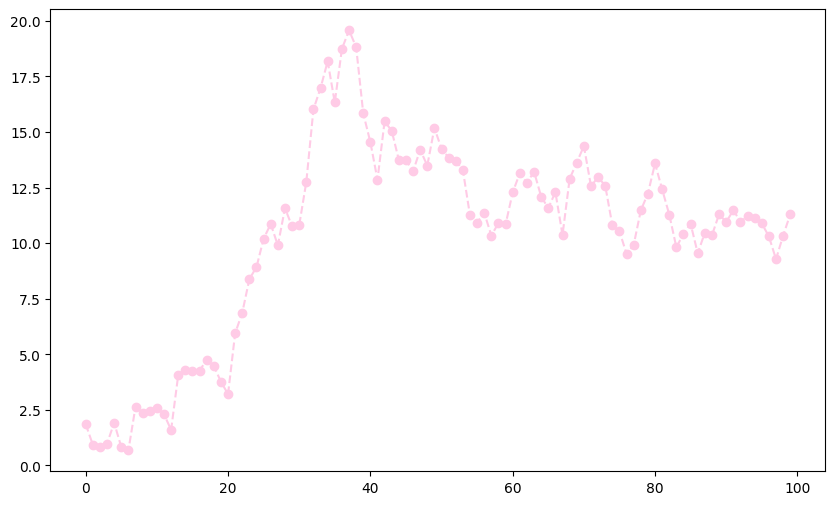

In [28]:
plt.plot(randn(100).cumsum(), marker="o", linestyle="dashed", color = "#ffcbe6")

#### 여러 그래프 하나의 서브플롯에 그리기

- 여러 스타일의 그래프를 하나의 서브플롯에 그려 다양한 정보를 동시에 전달

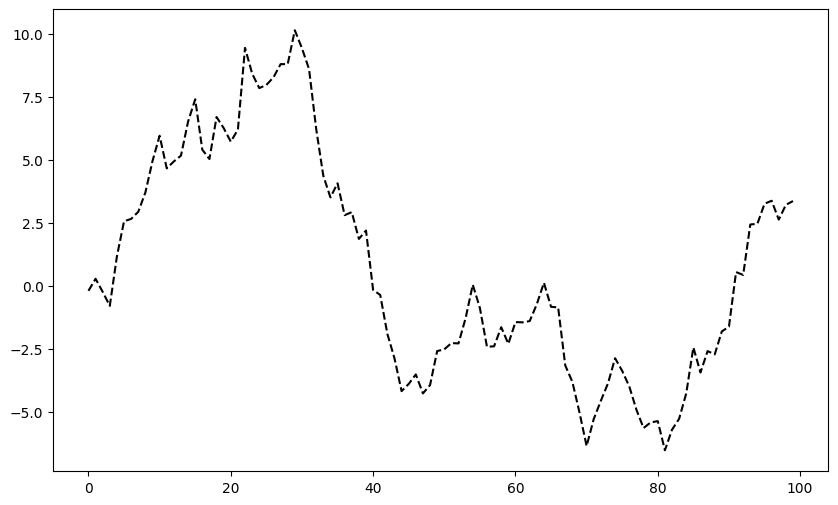

In [33]:
plt.plot(data, "k--")

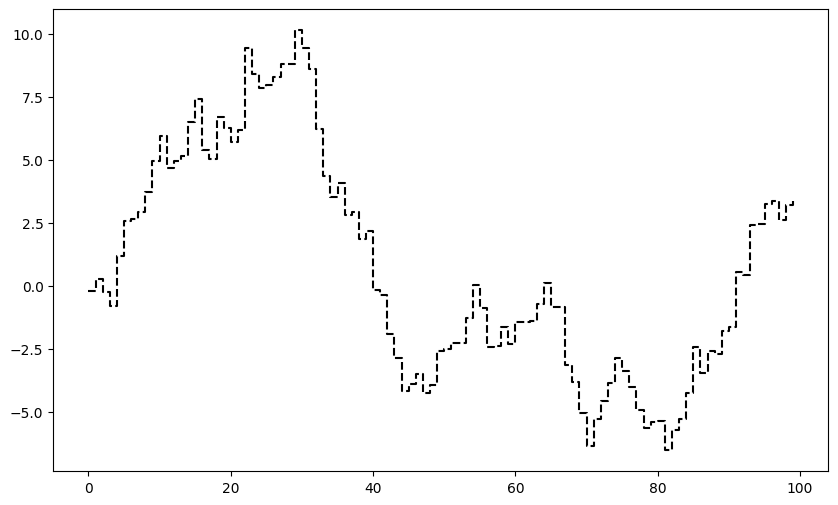

In [35]:
plt.plot(data, "k--", drawstyle = "steps-post")

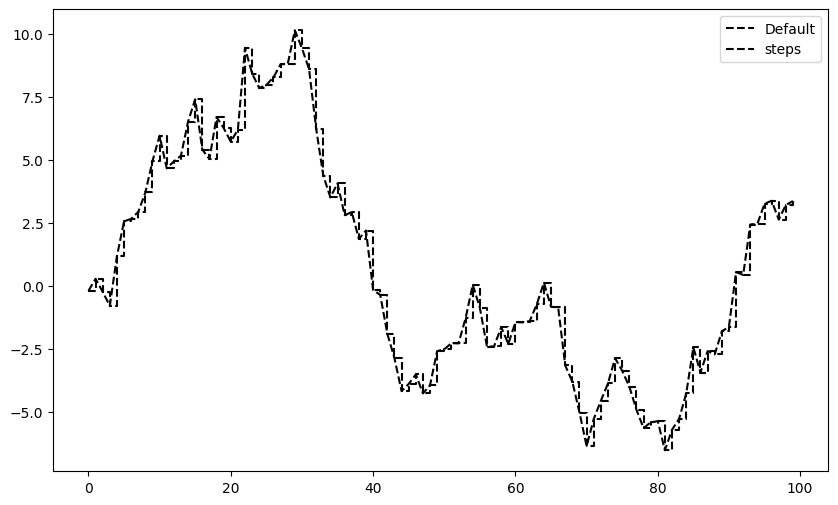

In [38]:
plt.plot(data, "k--", label = "Default")
plt.plot(data, "k--", drawstyle = "steps-post", label = "steps")
#두개넣으면 알아서 겹쳐짐 (단 범례가 맞아야 함)
# label의 범례 위치를 지정하여 가장 적절한 위치로 자동 생성
plt.legend(loc = "best")

- 범례 표기
    - `plt.legend()` 
    - `loc='best'`: 범례 위지 지정. 기본값은 auto

### 눈금과 라벨

#### 이미지 타이틀, 축 이름, 눈금, 눈금 이름 지정

##### 방법 1: 파이플롯 객체의 메서드 활용
- `set_xticks()` 함수: 눈금 지정
- `set_xticklabels()` 함수: 눈금 라벨 지정
- `set_title()` 함수: 그래프 타이틀 지정
- `set_xlabel()` 함수: x축 이름 지정

Text(0.5, 0, 'status')

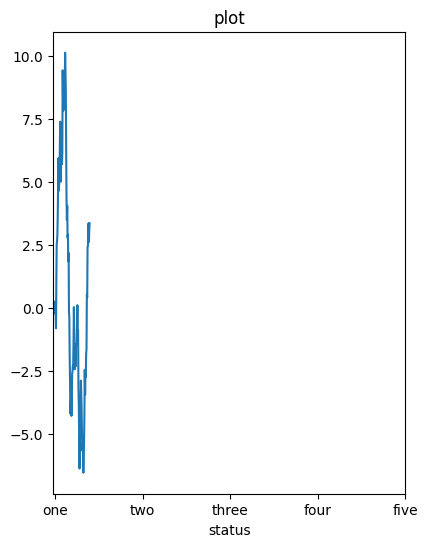

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.plot(data)

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one","two","three","four","five"])

ax.set_title("plot")
ax.set_xlabel("status")

##### 방법 2: pyplot 모듈의 함수 활용
- `plt.xticks()` 함수: 눈금 및 눈금 라벨 지정
- `plt.title()` 함수: 그래프 타이틀 지정
- `plt.xlabel()` 함수: x축 이름 지정

Text(0.5, 0, 'status')

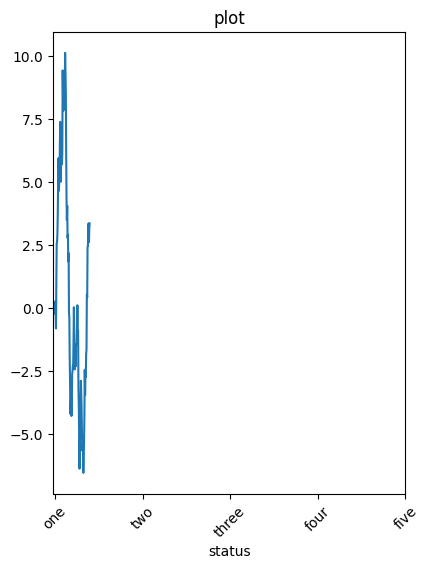

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.plot(data)

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one","two","three","four","five"], rotation = 45)

plt.title("plot")
plt.xlabel("status")

### 서브플롯에 주석 및 도형 추가하기

#### 주석 추가

설명을 위해 S&P 500 (스탠다드 앤 푸어스, Standard and Poor's 500)의 미국 500대 기업을 포함한 
주식시장지수 데이터로 그래프를 생성하고 2007-2008년 사이에 있었던 
재정위기와 관련된 중요한 날짜를 주석으로 추가한다.

In [47]:
spx_path = "https://raw.githubusercontent.com/myoh0623/dataset/main/spx.csv"

시간 컬럼을 행의 인덱스로 사용하자

- `index_col=0`: 0번 열(column)을 인덱스로 사용
- `parse_dates=True`: 년월일까지만 구분해서 인덱스로 사용. 기본값은 `False`.

In [49]:
data = pd.read_csv(spx_path,index_col=0, parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5472 entries, 1990-02-01 to 2011-10-14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPX     5472 non-null   float64
dtypes: float64(1)
memory usage: 85.5 KB


- 위 데이터를 그래프로 나타내 보자

<AxesSubplot: >

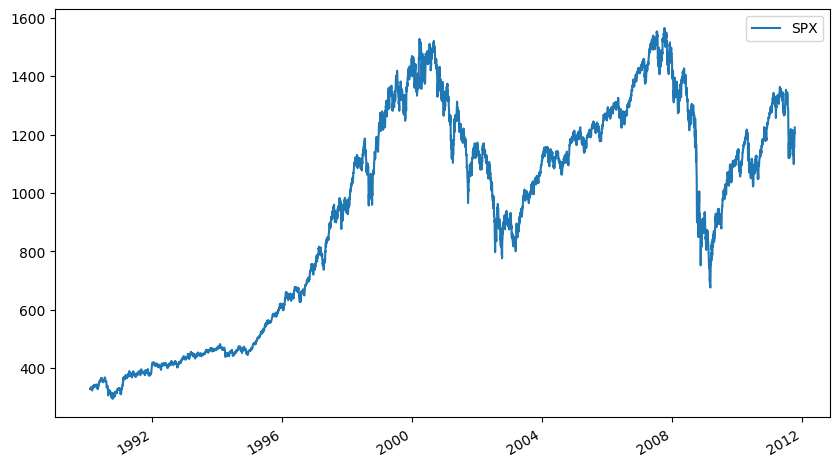

In [52]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data.plot(ax = ax, )

2007-2008년 세계적 금융위기 지점을 아래 내용으로 그래프에 주석으로 추가해보자.

- 2007년 10월 11일: 주가 강세장 위치 'Peak of bull market'
- 2008년 3월 12일: 베어스턴스 투자은행 붕괴 'Bear Stearns Fails'
- 2008년 9월 15일: 레만 투자은행 파산 'Lehman Bankruptcy'

In [53]:
from datetime import datetime

In [54]:
annot_data =[(datetime(2007,10,11), "peak of bull market"),
             (datetime(2008,3,12), "Bear Stearns Fails"),
             (datetime(2008,9,15), "Lehman Bankruptcy")]

#### `annotate()`

- `xt` 속성: 화살표 머리 위치
- `xytext` 속성: 텍스트 위치
- `arrowprops` 속성: 화살표 속성
- `horizontalalignment`: 텍스트 좌우 줄맞춤
- `verticalalignment`: 텍스트 상하 줄맞춤

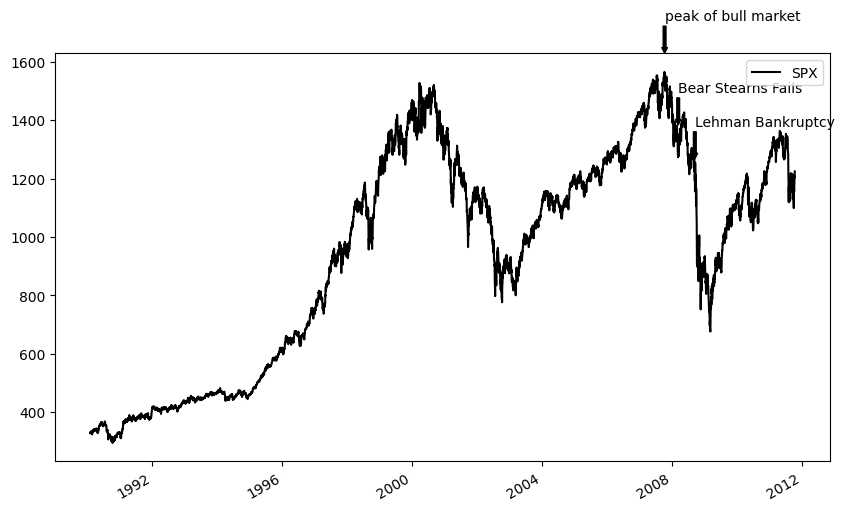

In [56]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data.plot(ax=ax, style='k-')

for date, label in annot_data:
    ax.annotate(label, 
                xy=(date, data.asof(date) + 75),
                xytext=(date, data.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
plt.show()

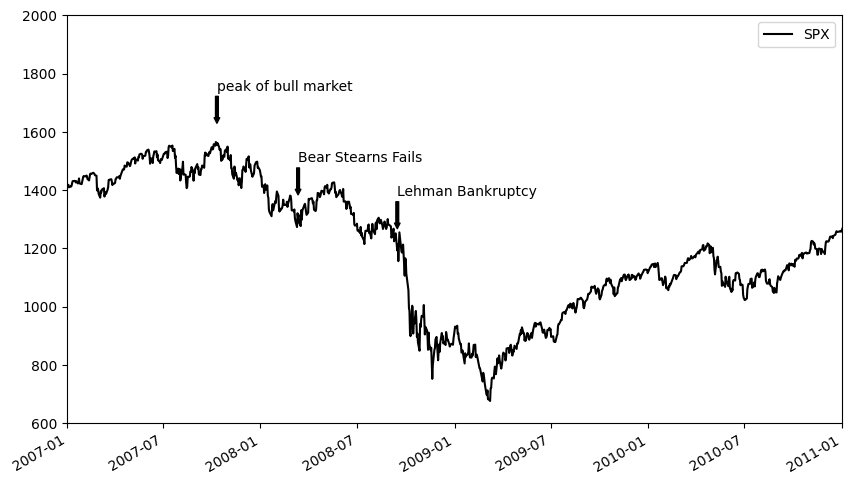

In [60]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data.plot(ax=ax, style='k-')

for date, label in annot_data:
    ax.annotate(label, 
                xy=(date, data.asof(date) + 75),
                xytext=(date, data.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(datetime(2007,1,1), datetime(2011,1,1))       
ax.set_ylim([600, 2000])            
plt.show()

#### 도형 추가

지정된 함수를 이용하여 다양한 도형을 추가 가능

- `plt.<도형명>((위치), 크기)`
- `plt.Rectangle()`: 직사각형. 왼편 아래 좌표 및 가로 세로 길이
- `plt.Circle()`: 원. 원의 중심 좌표 및 반지름.
- `plt.Polygon()`: 다각형. 각 꼭지점의 좌표.

__주의사항:__
- x, y축의 눈금이 다르면 도형이 정확하게 표현되지 않을 수 있다. 
- 예를 들어, 두 축의 척도가 다르면 원이 타원으로 보일수 있음
    - `Figure` 객체를 생성할 때 두 축의 크기를 동일하게 지정하면 척도가 동일해 진다. 

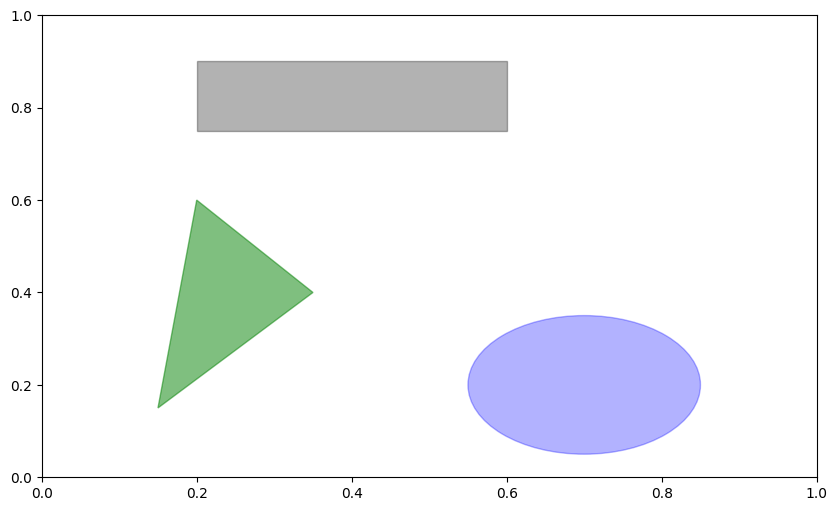

In [62]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

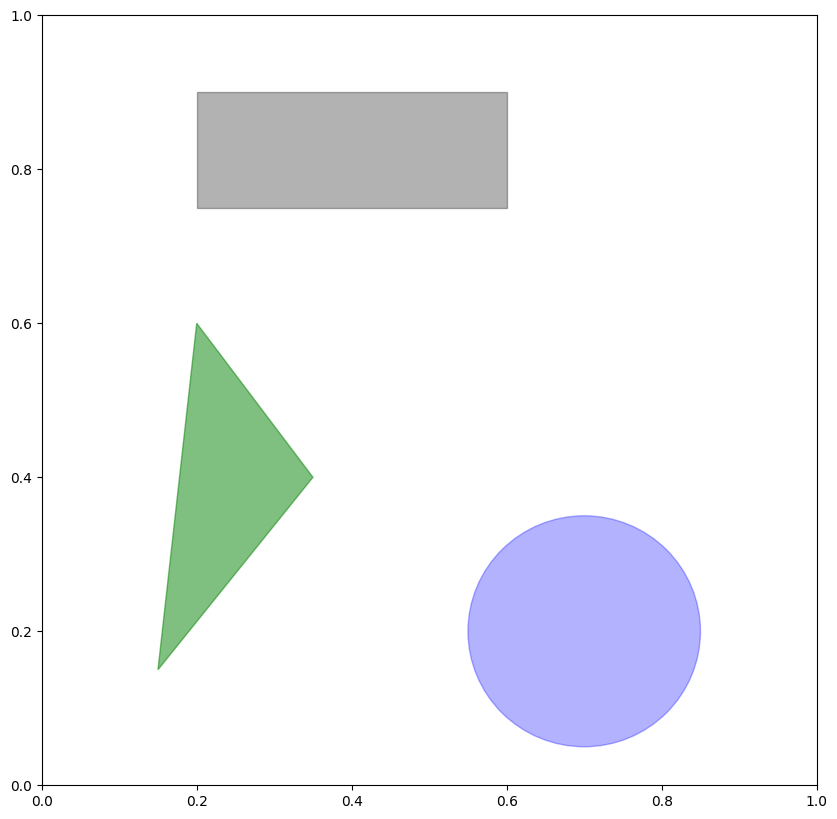

In [31]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

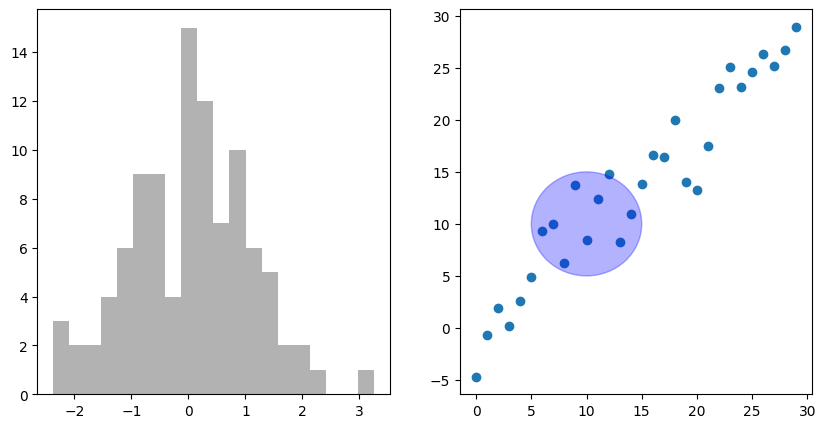

In [65]:
np.random.seed(12345)


fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
circ = plt.Circle((10, 10), 5, color='b', alpha=0.3)
ax2.add_patch(circ)
    

plt.savefig("./fig_1.png", dpi = 400)
plt.show()

### 그래프 저장하기

`plt.savefig()`

- `dpi=100`: 인치당 픽셀 수. 저장된 이미지의 해상도 지정.
- `bbox_inches=tight`: 이미지별 둘레의 공백 지정. 여기서는 공백을 거의 사용하지 말라는 의미임.

In [ ]:
np.random.seed(12345)


fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.hist(np.random.randn(100), bins=20, color='k', alpha=.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
circ = plt.Circle((10, 10), 5, color='b', alpha=0.3)
ax2.add_patch(circ)
    

plt.savefig("./fig_1.png", dpi = 400)

### matplotlib 기본 설정

`plt.rc()` 함수를 이용하여 matplot을 이용하여 생성되는 이미지 관련 설정을 전역적으로 지정할 수 있다.
사용되는 형식은 다음과 같다.

- 첫째 인자: 속성 지정
- 둘째 인자: 속성값 지정

__참고:__ 'rc' 는 기본설정을 의미하는 단어로 많이 사용된다. 
풀어 쓰면 "Run at startup and they Configure your stuff", 
즉, "프로그램이 시작할 때 기본값들을 설정한다"의 의미이다.
'.vimrc', '.bashrc', '.zshrc' 등 많은 애플리케이션의 초기설정 파일명에 사용되곤 한다.

아래 코드는 이미지의 사이즈를 지정한다.

In [66]:
plt.rc('figure', figsize=(10, 10))

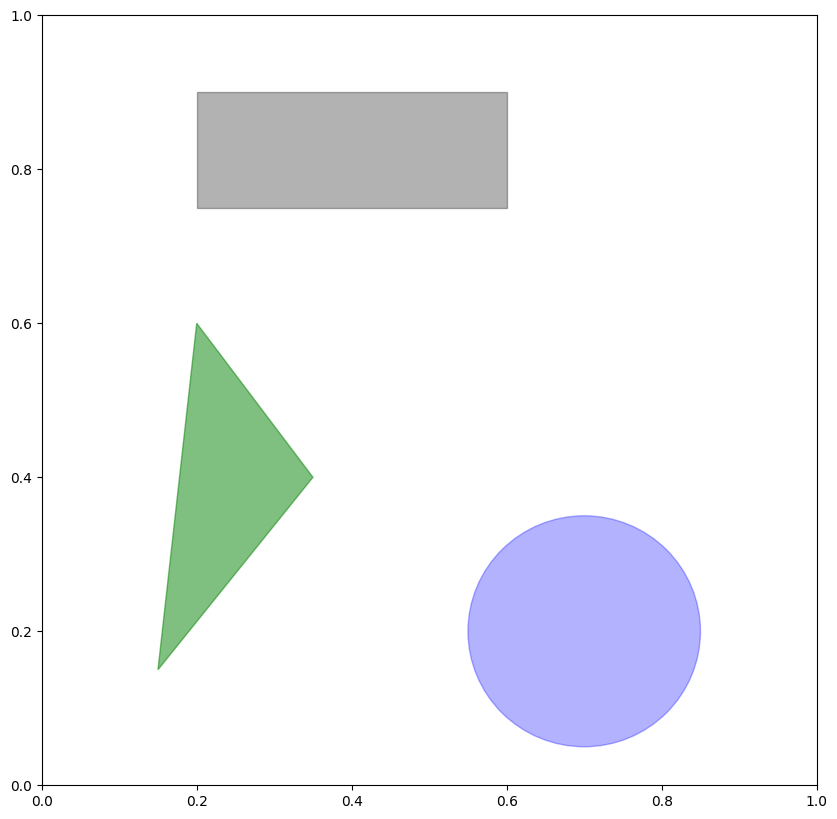

In [67]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

아래 코드는 다양한 속성을 지정하는 방식을 보여준다.

* 이미지 사이즈 지정

In [68]:
plt.rc("figure", figsize = (10,5))

* 선 속성 지정

In [69]:
plt.rc("lines", linewidth=2, color="r")

* 텍스트 폰트 속성 지정

In [70]:
plt.rc("font", family="monospace", size = 15)

* 그래프 구성 요소의 색상 지정

In [71]:
plt.rcParams["text.color"] = "blue"
plt.rcParams["xtick.color"] = "red"

아래 코드는 앞서 설정된 다양한 속성을 반영한 결과를 보여준다.

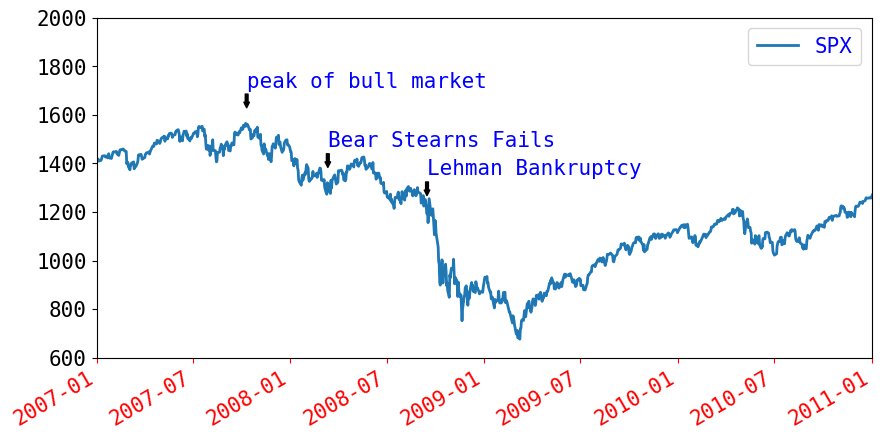

In [75]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data.plot(ax=ax, style='-')

for date, label in annot_data:
    ax.annotate(label, 
                xy=(date, data.asof(date) + 75),
                xytext=(date, data.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')

ax.set_xlim(datetime(2007,1,1), datetime(2011,1,1))       
ax.set_ylim([600, 2000])   
plt.show()